## Another way to check Daily Votality of Nifty 50 Stocks in 5 min with Python and Web scraping #Nifty50 Stocks- part 2

#AUTHOR : Anupam Singh. His Area of Interest are - Exploratory Data Analysis, Mining Social Web

#and Data Driven Problem Solving Approach

#For Intraday Trading checking Daily votality is the first step. Excel' Vlook up is one of best option to find Nifty50 stocks,but this method in python saved my time to do daily repetitive task


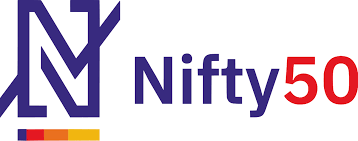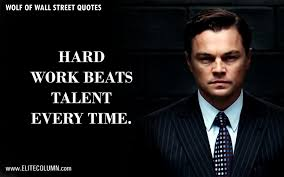

In [1]:
#Downlaod these libraries from the Python Module as mention. I just put a command to print " setup complete " to notify when libraries get downlaoded.
import pandas as pd
import wget
import numpy as np
print(" setup complete")

 setup complete


In [11]:
#download raw data set # url of the raw csv dataset from nse website. The daily volatility file
urls = ['https://www1.nseindia.com/archives/nsccl/volt/CMVOLT_25012021.CSV']

[wget.download(url) for url in urls]


['CMVOLT_25012021 (1).CSV']

In [12]:
# Loading Dataset to dataframe
DV_df = pd.read_csv('CMVOLT_25012021.CSV')


In [13]:
#To get glimse of downloaded data 

DV_df.head()

,Date,Symbol,Underlying Close Price (A),Underlying Previous Day Close Price (B),Underlying Log Returns (C) = LN(A/B),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E) = Sqrt(0.995*D*D + 0.005*C*C),Underlying Annualised Volatility (F) = E*Sqrt(365)
0,25-JAN-2021,20MICRONS,36.85,37.60,-0.0201,0.0313,0.0312,0.5961
1,25-JAN-2021,21STCENMGM,10.95,11.15,-0.0181,0.0221,0.0220,0.4203
2,25-JAN-2021,3IINFOTECH,7.05,7.39,-0.0471,0.0402,0.0403,0.7699
3,25-JAN-2021,3MINDIA,20006.95,20475.15,-0.0231,0.0211,0.0211,0.4031
4,25-JAN-2021,3PLAND,9.95,9.60,0.0358,0.0660,0.0659,1.2590


In [9]:
# To check what are the columns inside 
DV_df.columns


Index(['Date', 'Underlying Close Price (A)',
       'Underlying Previous Day Close Price (B)',
       'Underlying Log Returns (C) = LN(A/B)',
       'Previous Day Underlying Volatility (D)', 'Daily_Volatility',
       'Yearly_Volatility'],
      dtype='object')

In [14]:
# Now time for  some data wrangling. Convert naming  Daily Volatility & Annual Volatility Columns to Daily_Volatility & Yearly_Volatility for easyness.
DV_df = DV_df.rename({"Current Day Underlying Daily Volatility (E) = Sqrt(0.995*D*D + 0.005*C*C)":"Daily_Volatility","Underlying Annualised Volatility (F) = E*Sqrt(365)":"Yearly_Volatility",}, axis='columns')
DV_df.head()

,Date,Symbol,Underlying Close Price (A),Underlying Previous Day Close Price (B),Underlying Log Returns (C) = LN(A/B),Previous Day Underlying Volatility (D),Daily_Volatility,Yearly_Volatility
0,25-JAN-2021,20MICRONS,36.85,37.60,-0.0201,0.0313,0.0312,0.5961
1,25-JAN-2021,21STCENMGM,10.95,11.15,-0.0181,0.0221,0.0220,0.4203
2,25-JAN-2021,3IINFOTECH,7.05,7.39,-0.0471,0.0402,0.0403,0.7699
3,25-JAN-2021,3MINDIA,20006.95,20475.15,-0.0231,0.0211,0.0211,0.4031
4,25-JAN-2021,3PLAND,9.95,9.60,0.0358,0.0660,0.0659,1.2590


In [22]:
# To select only columns which are needed to get daily volatility of any stock

nifty=DV_df[["Symbol","Daily_Volatility","Yearly_Volatility"]]

In [27]:
# The Final Step ! to extract the needed information 
DFA=nifty.Symbol.str.contains('TATAMOTORS')
print(nifty[DFA])

print(" This was our Objective")
                         

          Symbol Daily_Volatility Yearly_Volatility
3849  TATAMOTORS           0.0362            0.6916
 This was our Objective


### VOILA! We got the daily volatility of TATAMOTORS! same way we have to jsut change name of stock script to get daily volatility .Thank you . See everyone again.